In [3]:
import lightgbm as lgb
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [4]:
data = pd.read_csv('/Users/elgun/Desktop/Machine_Learning_Project/data/regression.csv')
data

,No,Property_Type,Land_Area,Floor_Area,Condition,View,Amenities,Furnishing_Status,Air_Conditioning (Yes/No),Heating (Yes/No),...,Location,Num_bathrooms,Num_rooms,Price,distance to nearest MRT Station,distance to nearest Hospital,distance to nearest School,distance to nearest Bus Stand,distance to nearest Airport,Crimerate in area
0,1,Condo,1784,1555,New,NaN,Basic,Fully Furnished,No,Yes,...,Phoenix,3,2,334126,7.06,11.83,3.54,2.67,45.83,9.9
1,2,Farmhouse,1768,1530,New,City View,Basic,Semi Furnished,No,Yes,...,San Francisco,2,3,1895788,3.96,14.28,1.02,1.21,21.99,7.7
2,3,Apartment,2667,2667,Old,Park Facing,Rooftop Access,Fully Furnished,Yes,No,...,Miami,2,3,4397494,14.08,0.92,4.94,0.62,11.06,5.3
3,4,Apartment,1262,1262,Old,City View,NaN,Semi Furnished,Yes,No,...,Chicago,3,4,1367842,14.17,14.21,7.13,0.39,43.88,8.9
4,5,Apartment,1720,1720,Renovated,City View,Parking,Semi Furnished,Yes,No,...,New York,4,6,1403758,6.09,8.50,7.16,4.56,40.70,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499996,Condo,3815,2060,Renovated,City View,Basic,Semi Furnished,Yes,No,...,Boston,3,4,549973,8.48,17.41,4.18,0.85,24.97,9.3
499996,499997,Villa,6514,4525,Old,City View,"Gym, Swimming Pool",Semi Furnished,Yes,No,...,San Francisco,4,6,8464858,13.31,3.16,8.40,4.79,11.77,1.2
499997,499998,Apartment,2587,2587,Old,City View,Rooftop Access,Semi Furnished,Yes,No,...,Denver,5,3,3475517,8.51,14.24,4.09,0.37,24.30,6.2
499998,499999,Apartment,2897,2897,Old,NaN,Rooftop Access,Semi Furnished,Yes,No,...,Boston,4,5,1616638,7.24,10.08,5.18,4.70,8.78,8.3


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply the label encoder to each categorical column
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Display the first few rows of the dataframe to verify the changes
print(data.head())

   No  Property_Type  Land_Area  Floor_Area  Condition  View  Amenities  \
0   1              2       1784        1555          0     3          0   
1   2              3       1768        1530          0     0          0   
2   3              0       2667        2667          1     1         29   
3   4              0       1262        1262          1     0         40   
4   5              0       1720        1720          2     0         19   

   Furnishing_Status  Air_Conditioning (Yes/No)  Heating (Yes/No)  ...  \
0                  0                          0                 1  ...   
1                  1                          0                 1  ...   
2                  0                          1                 0  ...   
3                  1                          1                 0  ...   
4                  1                          1                 0  ...   

   Location  Num_bathrooms  Num_rooms    Price  \
0         7              3          2   334126   
1   

In [6]:
from sklearn.impute import SimpleImputer

# Create a median imputer object
median_imputer = SimpleImputer(strategy='median')

# Apply the imputer to the data
data_imputed = pd.DataFrame(median_imputer.fit_transform(data), columns=data.columns)

# Verify that there are no missing values left
print(data_imputed.isnull().sum())

No                                 0
Property_Type                      0
Land_Area                          0
Floor_Area                         0
Condition                          0
View                               0
Amenities                          0
Furnishing_Status                  0
Air_Conditioning (Yes/No)          0
Heating (Yes/No)                   0
Kitchen_Type                       0
Balcony (Yes/No)                   0
Maintenance_Fees                   0
Latitude                           0
Longitude                          0
Location                           0
Num_bathrooms                      0
Num_rooms                          0
Price                              0
distance to nearest MRT Station    0
distance to nearest Hospital       0
distance to nearest School         0
distance to nearest Bus Stand      0
distance to nearest Airport        0
Crimerate in area                  0
dtype: int64


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the data
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)

# Display the first few rows of the scaled dataframe to verify the changes
print(data_scaled.head())

         No  Property_Type  Land_Area  Floor_Area  Condition      View  \
0  0.000000       0.333333   0.051250    0.163857        0.0  1.000000   
1  0.000002       0.500000   0.050417    0.161222        0.0  0.000000   
2  0.000004       0.000000   0.097240    0.281033        0.5  0.333333   
3  0.000006       0.000000   0.024063    0.132982        0.5  0.000000   
4  0.000008       0.000000   0.047917    0.181243        1.0  0.000000   

   Amenities  Furnishing_Status  Air_Conditioning (Yes/No)  Heating (Yes/No)  \
0      0.000           0.000000                        0.0               1.0   
1      0.000           0.333333                        0.0               1.0   
2      0.725           0.000000                        1.0               0.0   
3      1.000           0.333333                        1.0               0.0   
4      0.475           0.333333                        1.0               0.0   

   ...  Location  Num_bathrooms  Num_rooms     Price  \
0  ...  0.777778  

                  No  Property_Type      Land_Area     Floor_Area  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean   250000.500000       2.326362    4124.896648    2326.954952   
std    144337.711635       2.195851    3349.107572    1534.688648   
min         1.000000       0.000000     800.000000       0.000000   
25%    125000.750000       0.000000    1946.000000    1235.000000   
50%    250000.500000       2.000000    3033.000000    2103.000000   
75%    375000.250000       4.000000    4993.000000    2961.000000   
max    500000.000000       6.000000   20000.000000    9490.000000   

           Condition           View      Amenities  Furnishing_Status  \
count  500000.000000  500000.000000  500000.000000      500000.000000   
mean        0.829984       1.301664      17.413124           1.259146   
std         0.812950       1.228286      15.653768           0.859618   
min         0.000000       0.000000       0.000000           0.000000   
25%         0

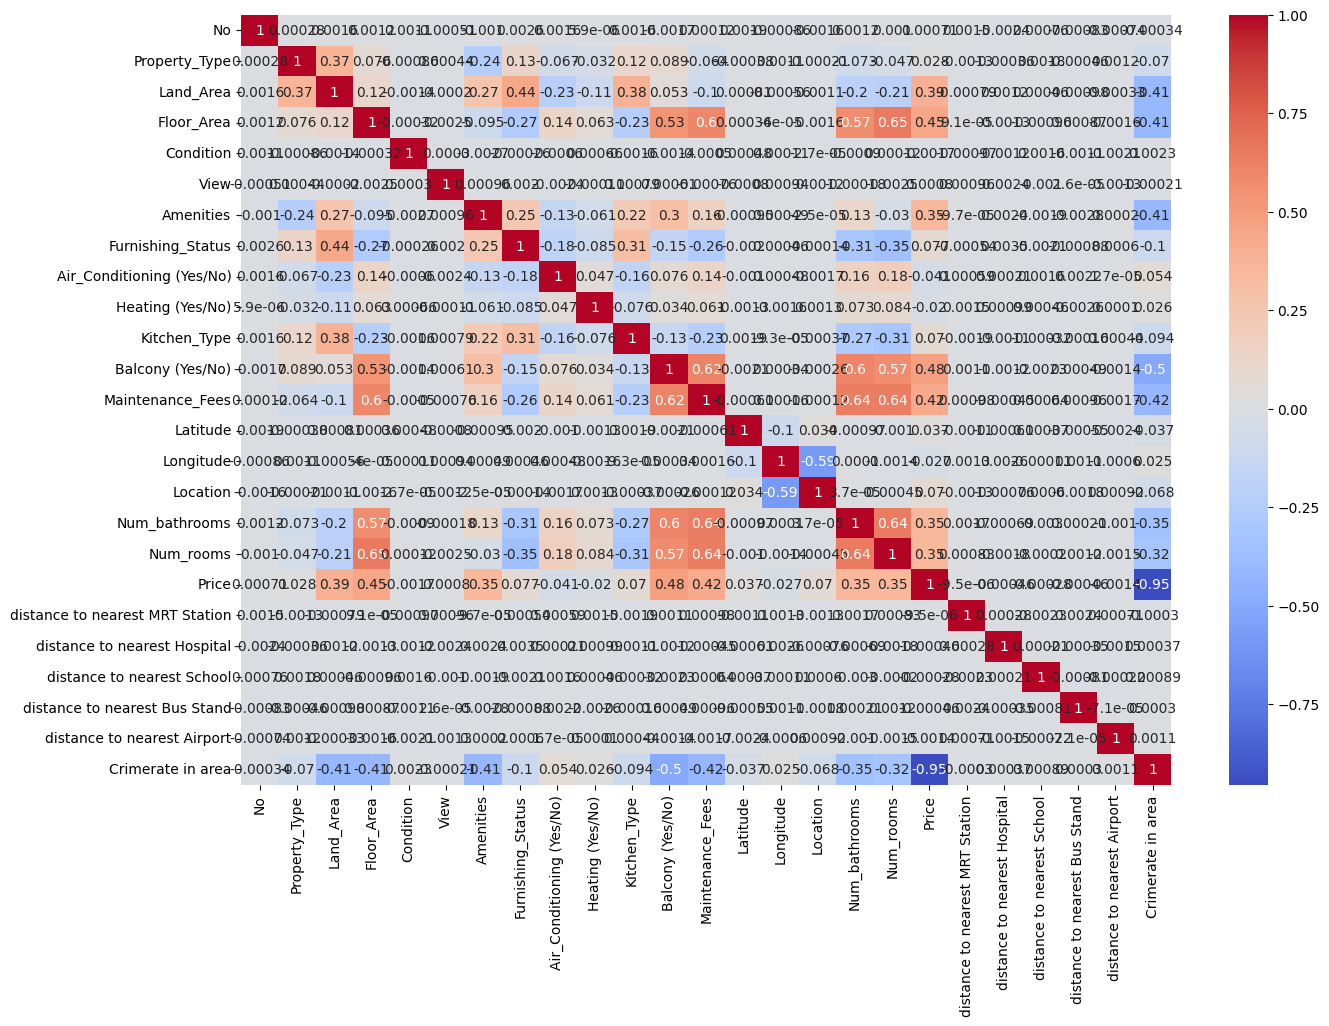

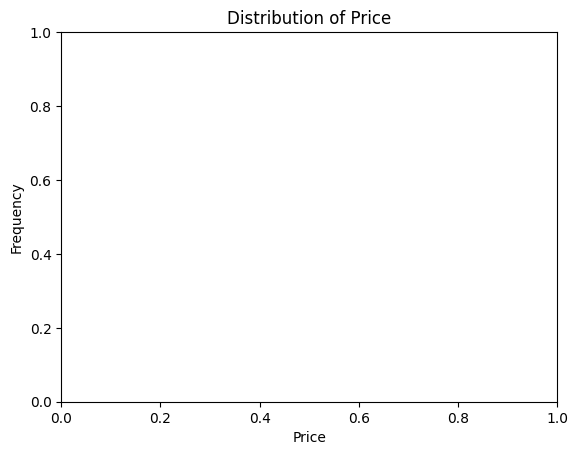

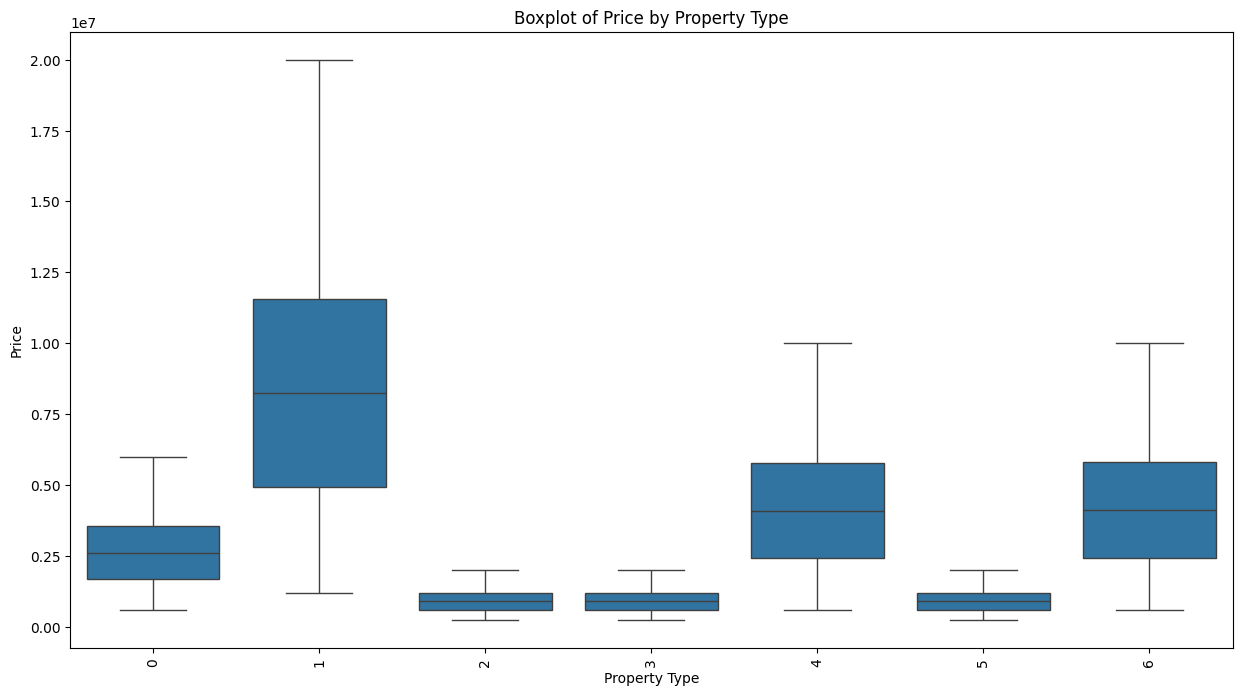

In [8]:


# Display basic statistics
print(data.describe())

# Display the first few rows of the dataframe
print(data.head())

# Plot correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot boxplot for 'Price' by 'Property_Type'
plt.figure(figsize=(15, 8))
sns.boxplot(x='Property_Type', y='Price', data=data)
plt.title('Boxplot of Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X = data_scaled.drop(['Price', 'No'], axis=1)
y = data_scaled['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



R-Squared: 0.9200108934012206
Mean Squared Error: 0.0015691524994960715


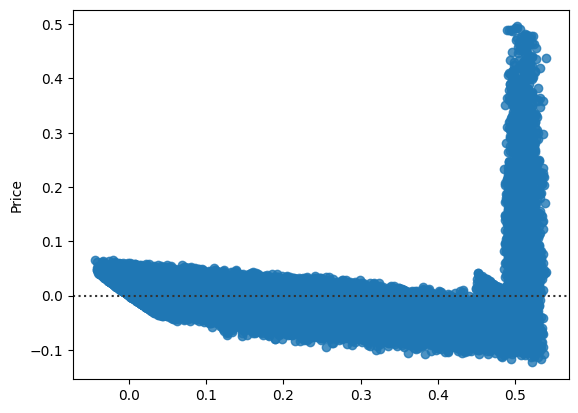

In [10]:
# Initialize the linear regression model
linear_regressor = LinearRegression()

# Fit the model to the training data
linear_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
r_squared = linear_regressor.score(X_test, y_test)
residuals_linear_regression_plot = sns.residplot(x=y_pred, y=y_test)
print(f'R-Squared: {r_squared}')
print(f'Mean Squared Error: {mse}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2735
[LightGBM] [Info] Number of data points in the train set: 320000, number of used features: 23
[LightGBM] [Info] Start training from score 0.136984
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2735
[LightGBM] [Info] Number of data points in the train set: 320000, number of used features: 23
[LightGBM] [Info] Start training from score 0.136827
[LightGBM] [Warning] Found

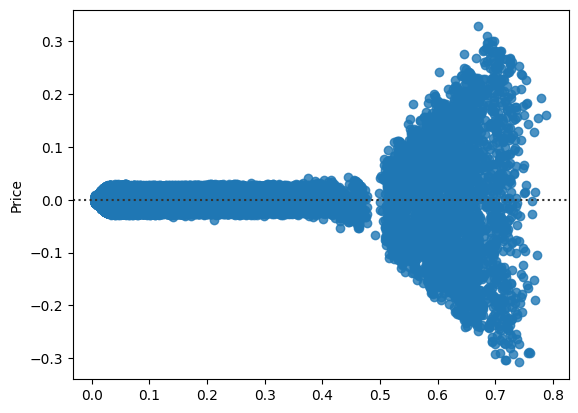

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Initialize the LightGBM regressor
lgb_regressor = lgb.LGBMRegressor()

# Define the MSE scorer
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=lgb_regressor, param_grid=param_grid, scoring=mse_scorer, cv=5)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best MSE Score: {best_score}')

# Make predictions on the test data using the best estimator
y_pred_lgb = grid_search.best_estimator_.predict(X_test)

# Calculate the mean squared error on the test data
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r_squared = grid_search.best_estimator_.score(X_test, y_test)
residuals_lgb_plot = sns.residplot(x=y_pred_lgb, y=y_test)
print(f'Mean Squared Error (LightGBM): {mse_lgb}')
print(f'Mean Squared Error (LightGBM): {mse_lgb}')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object 

Best Parameters: {'epochs': 50, 'model__hidden_layer_sizes': (50,), 'model__learning_rate': 0.01}
Best MSE Score: -0.0007037483326690219
Mean Squared Error (MLP): 0.0006896095376183734
R-Squared (MLP): 0.9648464691393565


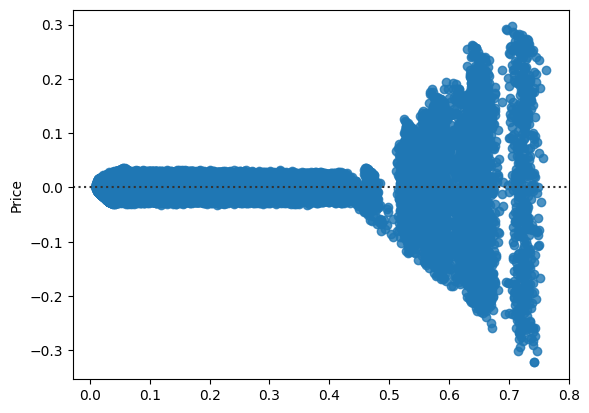

In [16]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Define the function to create the model
def create_model(hidden_layer_sizes=(50,), learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layer_sizes[0], input_dim=X_train.shape[1], activation='relu'))
    for units in hidden_layer_sizes[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create the KerasRegressor
model = KerasRegressor(model=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'model__hidden_layer_sizes': [(50,)],
    'model__learning_rate': [0.01],
    'epochs': [50]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best MSE Score: {best_score}')

# Make predictions on the test data using the best estimator
y_pred_mlp = grid_search.best_estimator_.predict(X_test)

# Calculate the mean squared error on the test data
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r_squared_mlp = grid_search.best_estimator_.score(X_test, y_test)
residuals_mlp_plot = sns.residplot(x=y_pred_mlp, y=y_test)
print(f'Mean Squared Error (MLP): {mse_mlp}')
print(f'R-Squared (MLP): {r_squared_mlp}')


In [17]:
# Compare the models based on Mean Squared Error (MSE)
mse_values = {
    'Linear Regression': mse,
    'LightGBM': mse_lgb,
    'MLP': mse_mlp
}

# Find the model with the lowest MSE
best_model_name = min(mse_values, key=mse_values.get)
best_model_mse = mse_values[best_model_name]

print(f'The best model is {best_model_name} with a Mean Squared Error of {best_model_mse}')

The best model is LightGBM with a Mean Squared Error of 0.0006574862803625383
